In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [6]:
data = pd.read_csv("covid.csv", sep=',')

In [8]:
##Quitamos los valores que no queremos
data.drop(data[(data['clasificacion_resumen'] == 'Sospechoso')].index, inplace=True)
data.drop(data[(data['sexo'] == 'NR')].index, inplace=True)
data.dropna(axis=0)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
1723,1000163,M,61.0,Años,Argentina,CABA,COMUNA 07,CABA,2020-05-28,2020-06-01,...,2020-06-17,SI,2,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2020-06-01,7,2022-06-05
3829,10003636,F,75.0,Años,Argentina,Santa Fe,Castellanos,Santa Fe,2021-04-06,2021-04-08,...,2021-04-22,NO,82,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,82,2021-04-08,21,2022-06-05
5371,1000514,M,63.0,Años,Argentina,Río Negro,General Roca,Río Negro,2020-05-31,2020-06-01,...,2020-06-22,SI,62,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,62,2020-06-05,42,2022-06-05
5497,10005260,M,79.0,Años,Argentina,Buenos Aires,Quilmes,Buenos Aires,2021-04-07,2021-04-08,...,2021-04-24,SI,6,Privado,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2021-04-08,658,2022-06-05
5972,10005719,F,54.0,Años,Argentina,Corrientes,Esquina,Corrientes,2021-04-04,2021-04-08,...,2021-04-21,SI,18,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,18,2021-04-07,49,2022-06-05
6502,10006233,F,77.0,Años,Argentina,CABA,COMUNA 09,CABA,2021-04-04,2021-04-08,...,2021-04-14,SI,2,Privado,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2021-04-08,9,2022-06-05
7006,1000672,M,81.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-30,2020-06-01,...,2020-06-23,SI,2,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2020-06-01,0,2022-06-05
7957,10007637,F,59.0,Años,Argentina,Buenos Aires,Florencio Varela,Buenos Aires,2021-03-29,2021-04-08,...,2021-04-21,SI,6,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2021-04-09,274,2022-06-05
8752,10008399,M,53.0,Años,SIN ESPECIFICAR,La Pampa,Maracó,La Pampa,2021-04-02,2021-04-08,...,2021-04-30,NO,42,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,42,2021-04-08,105,2022-06-05
8928,10008565,F,75.0,Años,Argentina,Mendoza,General Alvear,Mendoza,2021-04-03,2021-04-08,...,2021-04-24,SI,50,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,50,2021-04-07,14,2022-06-05


In [14]:
data.keys()

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [10]:
columnas = ['sexo', 'edad', 'cuidado_intensivo', 'clasificacion_resumen', 'asistencia_respiratoria_mecanica', 'fallecido']
datos_seleccionados = data[columnas].dropna()

In [12]:
datos_seleccionados['sexo'] = datos_seleccionados['sexo'].str.strip().map({'M': 0, 'F': 1})
datos_seleccionados['cuidado_intensivo'] = datos_seleccionados['cuidado_intensivo'].str.strip().map({'NO': 0, 'SI': 1})
datos_seleccionados['asistencia_respiratoria_mecanica'] = datos_seleccionados['asistencia_respiratoria_mecanica'].str.strip().map({'NO': 0, 'SI': 1})
datos_seleccionados['fallecido'] = datos_seleccionados['fallecido'].str.strip().map({'NO': 0, 'SI': 1})
datos_seleccionados['clasificacion_resumen'] = datos_seleccionados['clasificacion_resumen'].str.strip().map({'Descartado': 0, 'Confirmado': 1})

In [81]:
datos_seleccionados.head()

,sexo,cuidado_intensivo,clasificacion_resumen,asistencia_respiratoria_mecanica,fallecido
0,0,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


/tmp/ipykernel_99/373333694.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos_seleccionados.drop(['fallecido'],1).hist()


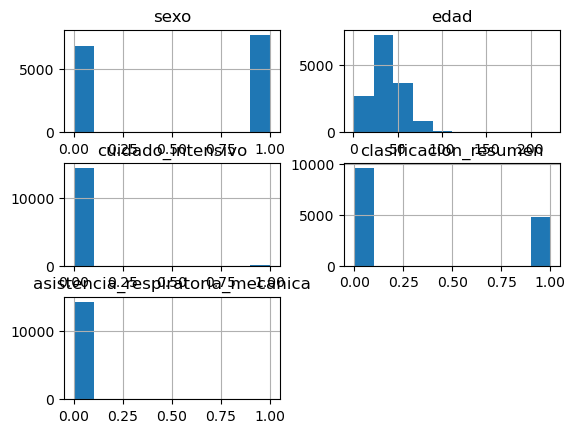

In [38]:
datos_seleccionados.drop(['fallecido'],1).hist()
plt.show()

In [24]:
X = datos_seleccionados.drop('fallecido', axis=1)
y = datos_seleccionados['fallecido']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=7)

In [26]:
model = LogisticRegression(max_iter=15000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [28]:
prediction = model.predict(X_validation)

In [30]:
accuracy = accuracy_score(y_validation, prediction)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.99


In [32]:
print(classification_report(y_validation, prediction, zero_division=1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2862
           1       0.57      0.18      0.28        22

    accuracy                           0.99      2884
   macro avg       0.78      0.59      0.64      2884
weighted avg       0.99      0.99      0.99      2884



In [36]:

print("Matriz de Confusión:")
print(confusion_matrix(y_validation, prediction))
print("\nInforme de Clasificación:")
print(classification_report(y_validation, prediction))
print("\nPrecisión del Modelo:", accuracy_score(y_validation, prediction))

Matriz de Confusión:
[[2859    3]
 [  18    4]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2862
           1       0.57      0.18      0.28        22

    accuracy                           0.99      2884
   macro avg       0.78      0.59      0.64      2884
weighted avg       0.99      0.99      0.99      2884


Precisión del Modelo: 0.9927184466019418
